In [73]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

# Q2
Read `LineDetection.jpg` (the image below)




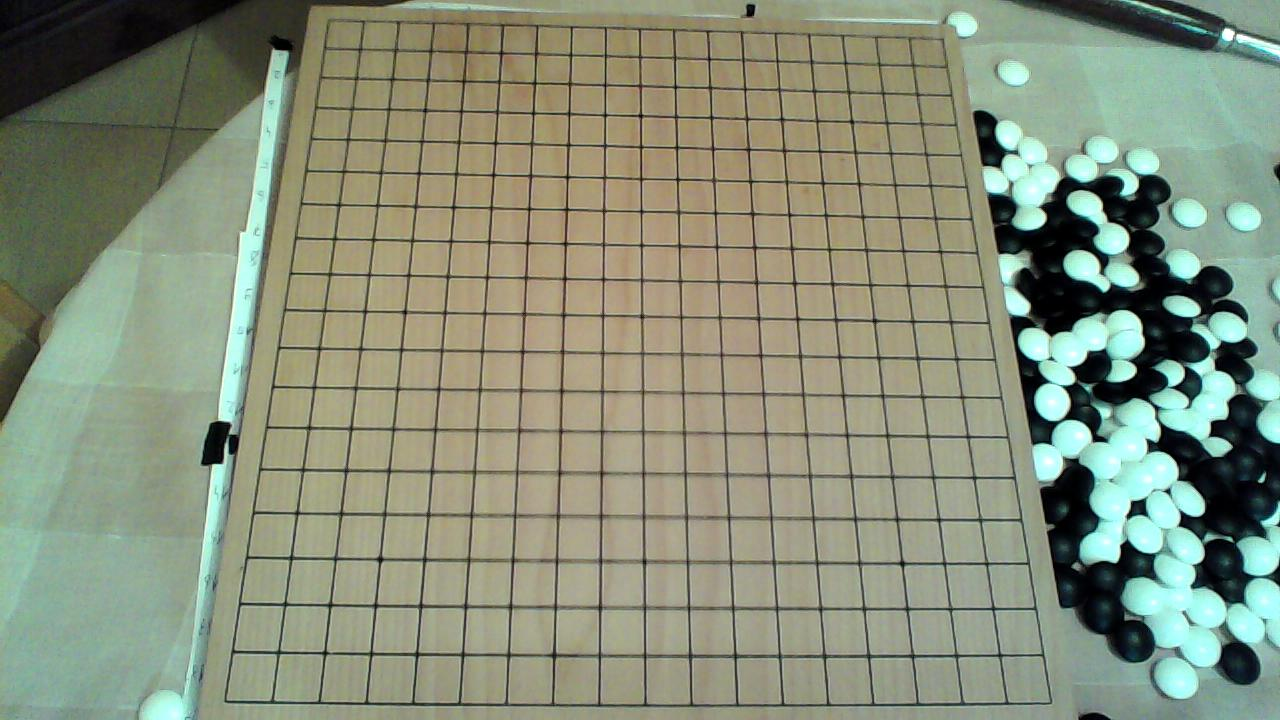

Use Hough to detect lines.

Note that you should consider the `Threshold`!

Here the threshold is `250`


True

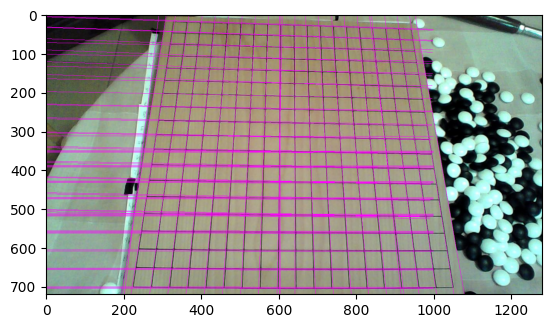

In [26]:
#TODO
# https://www.geeksforgeeks.org/line-detection-python-opencv-houghline-method
img = cv2.imread("LineDetection.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
lines = cv2.HoughLines(edges, 1, np.pi/180, 250)

for line in lines:
    x, th = line[0]
    x0 = x * np.cos(th)
    y0 = x * np.sin(th)
    p1 = (int(x0 + 1000  * (-np.sin(th))), int(y0 + 1000 * (np.cos(th))))
    p2 = (int(x0 - 1000 * (-np.sin(th))), int(y0 - 1000 * (np.cos(th))))
    cv2.line(img, p1, p2, (255, 0, 255), 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img, cmap="gray")   
cv2.imwrite("q2_1.jpg",img)

Here is a sample output:

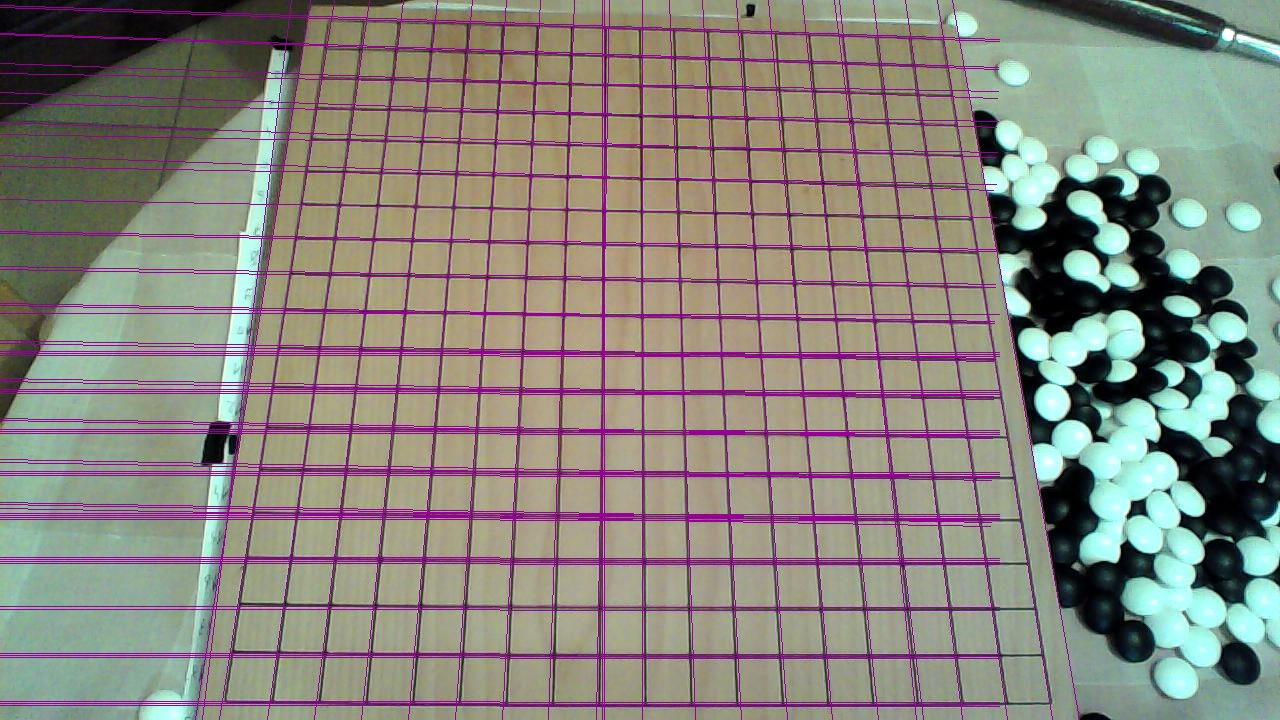

Now use *Probabilistic Hough Transform*. then, apply it to this picture.

True

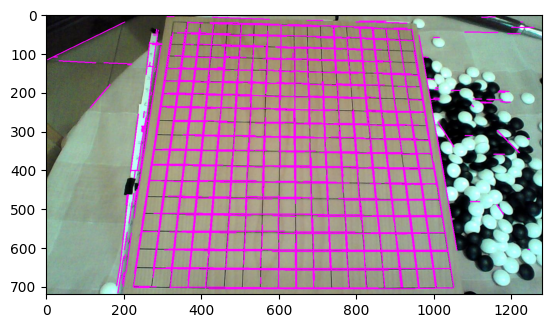

In [38]:
#TODO
img = cv2.imread("LineDetection.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

lines = cv2.HoughLinesP(
			edges, # Input edge image
			1, # Distance resolution in pixels
			np.pi/180, # Angle resolution in radians
			threshold=100, # Min number of votes for valid line
			minLineLength=5, # Min allowed length of line
			maxLineGap=10 # Max allowed gap between line for joining them
			)

for points in lines:
	x1, y1, x2, y2 = points[0]
	cv2.line(img, (x1, y1), (x2, y2), (255, 0, 255), 2)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img, cmap="gray")   
cv2.imwrite('q2_2.png', img)


Here is a sample output (Not the best one): 

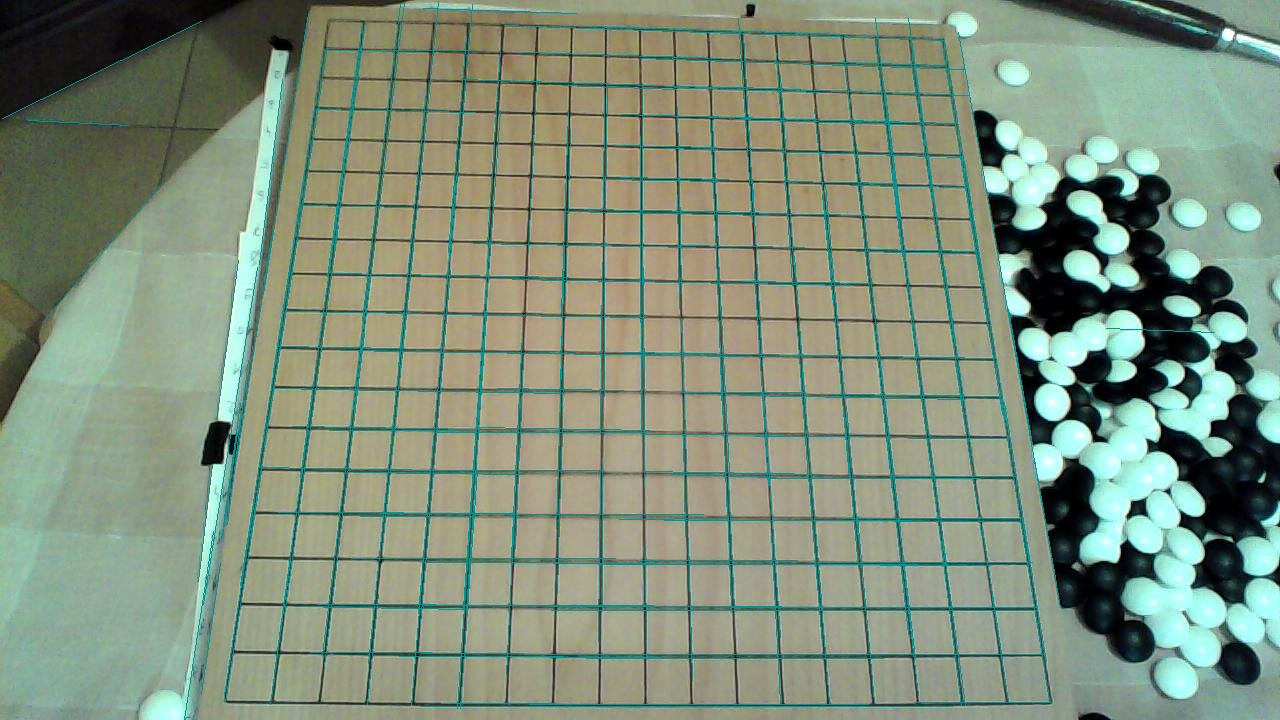

Note that you should find the optimum amount of parameters which are used in this algorithm.

# Q3

What does this cell of code do? Explain the algorithm.

Then Compare it with the results of the previous part.

In [39]:
img = cv2.imread("LineDetection.jpg",0)
imgcolorous = cv2.imread('LineDetection.jpg')
UNKNOWN = cv2.createLineSegmentDetector(0)
lines = UNKNOWN.detect(img)[0]
drawn_img = UNKNOWN.drawSegments(imgcolorous,lines)
cv2.imwrite('UNKNOWN.jpg',drawn_img)

True

# Q4

In the cells below you should define two functions that one of them covert RGB to CMYK and another one Convert them vice versa. 

In [68]:
def rgb_to_cmyk(r, g, b, RGB_SCALE = 255, CMYK_SCALE = 100):

  r = r / RGB_SCALE
  g = g / RGB_SCALE
  b = b / RGB_SCALE

  k = 1 - max(r, g, b)
  
  c = int(((1 - k - r) / (1 - k)) * CMYK_SCALE)
  m = int(((1 - k - g) / (1 - k)) * CMYK_SCALE)
  y = int(((1 - k - b) / (1 - k)) * CMYK_SCALE)
  k = int(k * CMYK_SCALE)


  return c, m, y, k

In [69]:
rgb_to_cmyk(25, 56, 25)

(55, 0, 55, 78)

Expected Output: (55, 0, 55, 78)

In [71]:
def cmyk_to_rgb(c, m, y, k, CMYK_SCALE = 100, RGB_SCALE = 255):

  c = c / CMYK_SCALE
  m = m / CMYK_SCALE
  y = y / CMYK_SCALE
  k = k / CMYK_SCALE

  r = int(round(255 * (1 - c) * (1 - k), 2))
  g = int(round(255 * (1 - m) * (1 - k), 2))
  b = int(round(255 * (1 - y) * (1 - k), 2))

  return r, g, b

In [72]:
cmyk_to_rgb(55, 0, 55, 78)

(25, 56, 25)

Expected Output: (25, 56, 25)

# Q5
Compute the HSI parametes and V, L and Y according to lectures.

In [107]:
def HSI_V_L_Y(r, g, b):
    th = (math.acos(((r - g) + (r - b))/(2 * math.sqrt(math.pow(r - g, 2) + ((r - b) * (g - b))))) * 180) / np.pi
    if (b > g):
        H = 360 - th
    else:
        H = th

    S = 1 - 3 * (min(r, g, b) / (r + b + g))
    I = (r + b + g) / (3 * 255)

    V = max(r, g, b) / 255
    L = (max(r, g, b) + min(r, g, b)) / (2 * 255)

    Y = 0.299 * r + 0.587 * g + 0.114 * b

    return round(H, 2), round(S, 2), round(I, 2) , round(V, 2), round(L, 2), round(Y, 2)

In [108]:
HSI_V_L_Y(150, 65, 200)

(278.51, 0.53, 0.54, 0.78, 0.52, 105.8)

# Good Luck!